/tmp/ipykernel_2441604/864127040.py:62: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0, 0), 1, 1, color=c, edgecolor='k') for c in color_list]


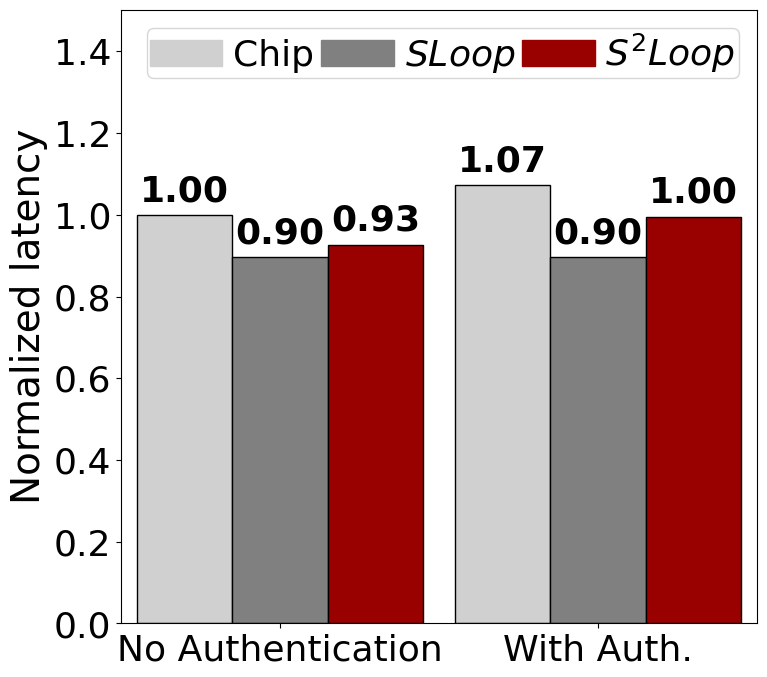

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Raw latencies
latencies_plain_raw = [164478, 147456, 152480]
latencies_crypto_raw = [176480, 147456, 163776]

# Normalize to global minimum
global_min = latencies_plain_raw[0]
latencies_plain = [v / global_min for v in latencies_plain_raw]
latencies_crypto = [v / global_min for v in latencies_crypto_raw]

group_labels = ["No Authentication", "With Auth."]
method_labels = ["Chip", r"$SLoop$", r"$S^2Loop$"]
color_list = ["#D0D0D0", "#808080", "#990000"]

# Font sizes - all increased to 24 or higher
SMALL_SIZE = 24  # Increased from 18
MEDIUM_SIZE = 26 # Increased from 22
BIGGER_SIZE = 28 # Increased from 26

bar_width = 0.3  # increased from 0.2 to 0.3 (1.5x wider)
fig, ax = plt.subplots(figsize=(8, 7))

# Fixed group centers
x_center_plain = 0
x_center_crypto = 1

# Offset each bar in a group by this
offsets = np.array([-bar_width, 0, bar_width])

# Compute x positions for bars
x_plain = x_center_plain + offsets
x_crypto = x_center_crypto + offsets

# Plot bars
plain_bars = ax.bar(x_plain, latencies_plain, width=bar_width, color=color_list, edgecolor='k')
crypto_bars = ax.bar(x_crypto, latencies_crypto, width=bar_width, color=color_list, edgecolor='k')

# X ticks
ax.set_xticks([x_center_plain, x_center_crypto])
ax.set_xticklabels(group_labels, fontsize=MEDIUM_SIZE)

# Labels and limits
ax.set_ylabel("Normalized latency", fontsize=BIGGER_SIZE)
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([0, max(latencies_plain + latencies_crypto) * 1.4])
ax.tick_params(axis='y', labelsize=MEDIUM_SIZE)

# Annotate bar values
for bars in [plain_bars, crypto_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    fontweight='bold',
                    ha='center', va='bottom', fontsize=MEDIUM_SIZE)

# Legend
handles = [plt.Rectangle((0, 0), 1, 1, color=c, edgecolor='k') for c in color_list]
ax.legend(handles, method_labels, fontsize=MEDIUM_SIZE, title_fontsize=MEDIUM_SIZE, loc='best', ncol=3, handletextpad=0.3, columnspacing=0.2, borderpad=0.1)

plt.tight_layout()
plt.savefig("RTL_validation.pdf", bbox_inches="tight", transparent=True)
plt.show()

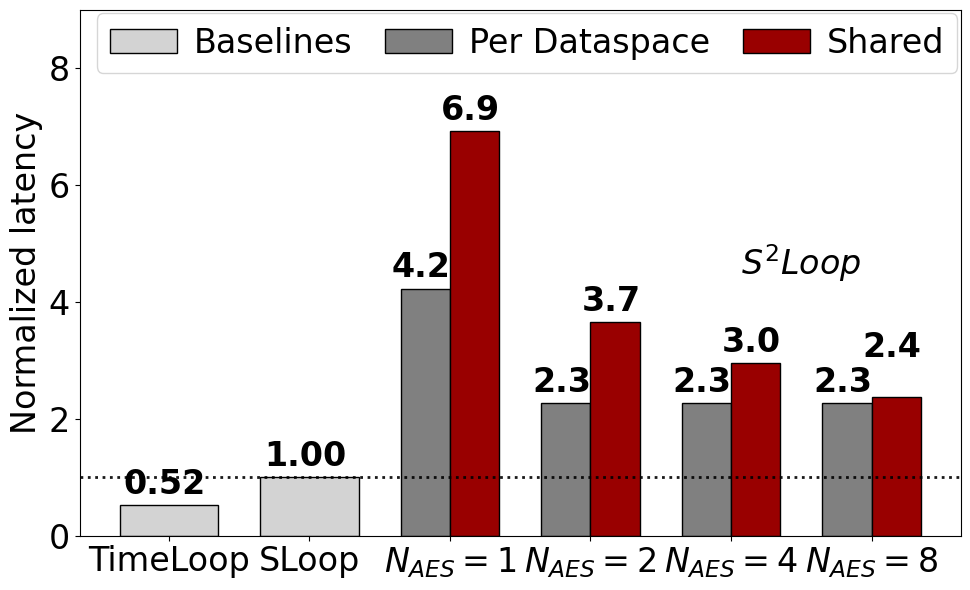

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data from the Chart ---
# Define the categories for the x-axis
categories = ['TimeLoop', 'SLoop', r'$N_{AES}=1$', r'$N_{AES}=2$', r'$N_{AES}=4$', r'$N_{AES}=8$']
# Data for the first two bars (Baselines)
baseline_values = {
    'TimeLoop': 0.52,
    'SLoop': 1.00
}

# Data for the grouped bars
per_dataspace_values = [4.23, 2.27, 2.27, 2.27]
shared_values = [6.93, 3.66, 2.96, 2.37]

# --- Colors from the Chart ---
color_baseline = '#d3d3d3'  # Light grey
color_per_dataspace = 'grey'
color_shared = '#990000'    # Dark red
color_border = 'black'

# --- Plotting Setup ---
# Create figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions for the bars on the x-axis
x_pos = np.arange(len(categories))
bar_width = 0.35  # Width of each bar

# --- Plotting the Bars ---

# 1. Plot the first two "Baseline" bars
# These are plotted individually at the first two positions.
bar1 = ax.bar(x_pos[0], baseline_values['TimeLoop'], width=bar_width * 2, color=color_baseline, edgecolor=color_border, label='Baselines')
bar2 = ax.bar(x_pos[1], baseline_values['SLoop'], width=bar_width * 2, color=color_baseline, edgecolor=color_border)


# 2. Plot the "Per Dataspace" and "Shared" grouped bars
# These start from the third position (index 2)
grouped_x_pos = x_pos[2:]
bar3 = ax.bar(grouped_x_pos - bar_width/2, per_dataspace_values, width=bar_width, color=color_per_dataspace, edgecolor=color_border, label='Per Dataspace')
bar4 = ax.bar(grouped_x_pos + bar_width/2, shared_values, width=bar_width, color=color_shared, edgecolor=color_border, label='Shared')

# --- Adding Data Labels on Top of Bars ---
def add_labels(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        # For first two bars, show 2 decimal places
        if bar.get_x() < 1.5:  # x position for first two bars
            label = f'{height:.2f}'
        else:  # For last 4 columns, show single digit
            # For red bars (shared values), add 1 to the height
            label = f'{height:.1f}'
            if bar.get_facecolor() == (0.6, 0, 0, 1):  # Dark red color in RGBA
                # Add 2 to height for final bar
                if height >= 2.3 and height <= 2.4:
                    height = height+0.5  # Increased from +4 to +5
                else:
                    height = height
        ax.annotate(label,
                    xy=(bar.get_x() + bar.get_width() / 2 - 0.03, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontweight='bold',
                    fontsize=24)

# Add labels to all sets of bars
add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

# --- Style and Formatting ---

# Add a horizontal dotted line at y=1.0
ax.axhline(y=1.0, color='black', linestyle=':', linewidth=2, alpha=0.9)

# Add horizontal arrow and text
arrow_y = 4  # Y position for the arrow
ax.annotate('', xy=(6, arrow_y), xytext=(3, arrow_y),
            arrowprops=dict(arrowstyle='<->', color='black', linestyle='dashed', linewidth=2))
ax.text(4.5, arrow_y + 0.3, r'$S^2Loop$', ha='center', va='bottom', fontsize=24)

# Set labels and title
ax.set_ylabel('Normalized latency', fontsize=24)
ax.set_xticks(x_pos)
ax.set_xticklabels(categories, fontsize=24)

# Set y-axis limits to give some space at the top
ax.set_ylim(0, 9)
ax.tick_params(axis='y', labelsize=24)

# Create and position the legend
ax.legend(ncol=3, loc='upper right', frameon=True, fontsize=24, borderaxespad=0.1, handletextpad=0.5, columnspacing=1.0)

# Ensure the layout is tight
plt.tight_layout()

plt.savefig("crypto_engine_scaling.pdf", bbox_inches="tight", transparent=True)

# --- Display the Plot ---
plt.show()

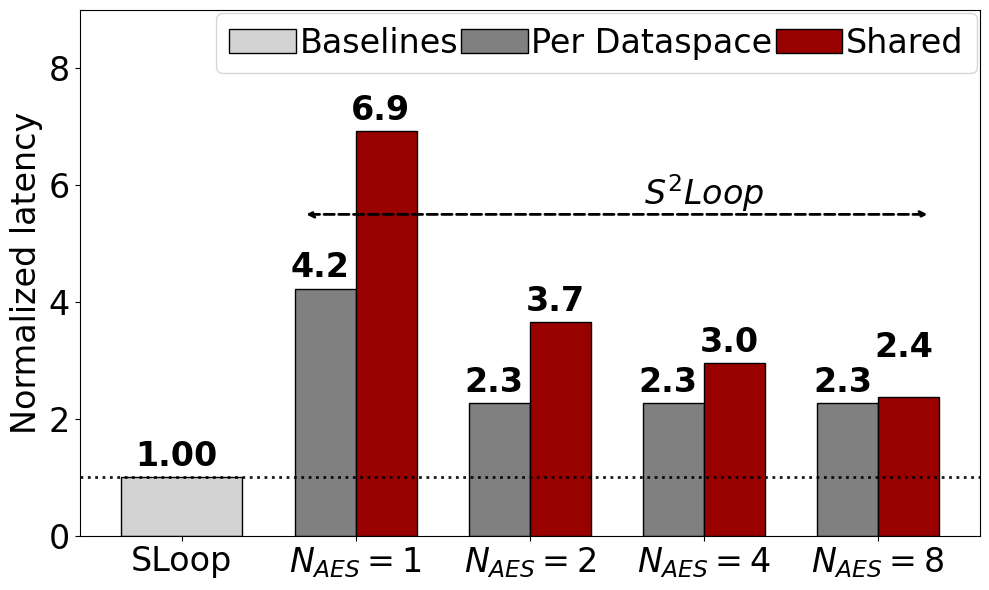

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data from the Chart ---
# Define the categories for the x-axis
categories = ['SLoop', r'$N_{AES}=1$', r'$N_{AES}=2$', r'$N_{AES}=4$', r'$N_{AES}=8$']
# Data for the first bar (Baseline)
baseline_values = {
    'SLoop': 1.00
}

# Data for the grouped bars
per_dataspace_values = [4.23, 2.27, 2.27, 2.27]
shared_values = [6.93, 3.66, 2.96, 2.37]

# --- Colors from the Chart ---
color_baseline = '#d3d3d3'  # Light grey
color_per_dataspace = 'grey'
color_shared = '#990000'    # Dark red
color_border = 'black'

# --- Plotting Setup ---
# Create figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions for the bars on the x-axis
x_pos = np.arange(len(categories))
bar_width = 0.35  # Width of each bar

# --- Plotting the Bars ---

# 1. Plot the "Baseline" bar
# Plot at the first position
bar1 = ax.bar(x_pos[0], baseline_values['SLoop'], width=bar_width * 2, color=color_baseline, edgecolor=color_border, label='Baselines')

# 2. Plot the "Per Dataspace" and "Shared" grouped bars
# These start from the second position (index 1)
grouped_x_pos = x_pos[1:]
bar3 = ax.bar(grouped_x_pos - bar_width/2, per_dataspace_values, width=bar_width, color=color_per_dataspace, edgecolor=color_border, label='Per Dataspace')
bar4 = ax.bar(grouped_x_pos + bar_width/2, shared_values, width=bar_width, color=color_shared, edgecolor=color_border, label='Shared')

# --- Adding Data Labels on Top of Bars ---
def add_labels(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        # For first bar, show 2 decimal places
        if bar.get_x() < 0.5:  # x position for first bar
            label = f'{height:.2f}'
        else:  # For last 4 columns, show single digit
            # For red bars (shared values), add 1 to the height
            label = f'{height:.1f}'
            if bar.get_facecolor() == (0.6, 0, 0, 1):  # Dark red color in RGBA
                # Add 2 to height for final bar
                if height >= 2.3 and height <= 2.4:
                    height = height+0.5  # Increased from +4 to +5
                else:
                    height = height
        ax.annotate(label,
                    xy=(bar.get_x() + bar.get_width() / 2 - 0.03, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontweight='bold',
                    fontsize=24)

# Add labels to all sets of bars
add_labels(bar1)
add_labels(bar3)
add_labels(bar4)

# --- Style and Formatting ---

# Add a horizontal dotted line at y=1.0
ax.axhline(y=1.0, color='black', linestyle=':', linewidth=2, alpha=0.9)

# Add horizontal arrow and text
arrow_y = 4  # Y position for the arrow
ax.annotate('', xy=(4.3, 5.5), xytext=(0.7, 5.5),
            arrowprops=dict(arrowstyle='<->', color='black', linestyle='dashed', linewidth=2))
ax.text(3, 5.5, r'$S^2Loop$', ha='center', va='bottom', fontsize=24)

# Set labels and title
ax.set_ylabel('Normalized latency', fontsize=24)
ax.set_xticks(x_pos)
ax.set_xticklabels(categories, fontsize=24)

# Set y-axis limits to give some space at the top
ax.set_ylim(0, 9)
ax.tick_params(axis='y', labelsize=24)

# Create and position the legend
ax.legend(ncol=3, loc='upper right', frameon=True, fontsize=24, borderaxespad=0.1, handletextpad=0.1, columnspacing=0.1)

# Ensure the layout is tight
plt.tight_layout()

plt.savefig("crypto_engine_scaling.pdf", bbox_inches="tight", transparent=True)

# --- Display the Plot ---
plt.show()

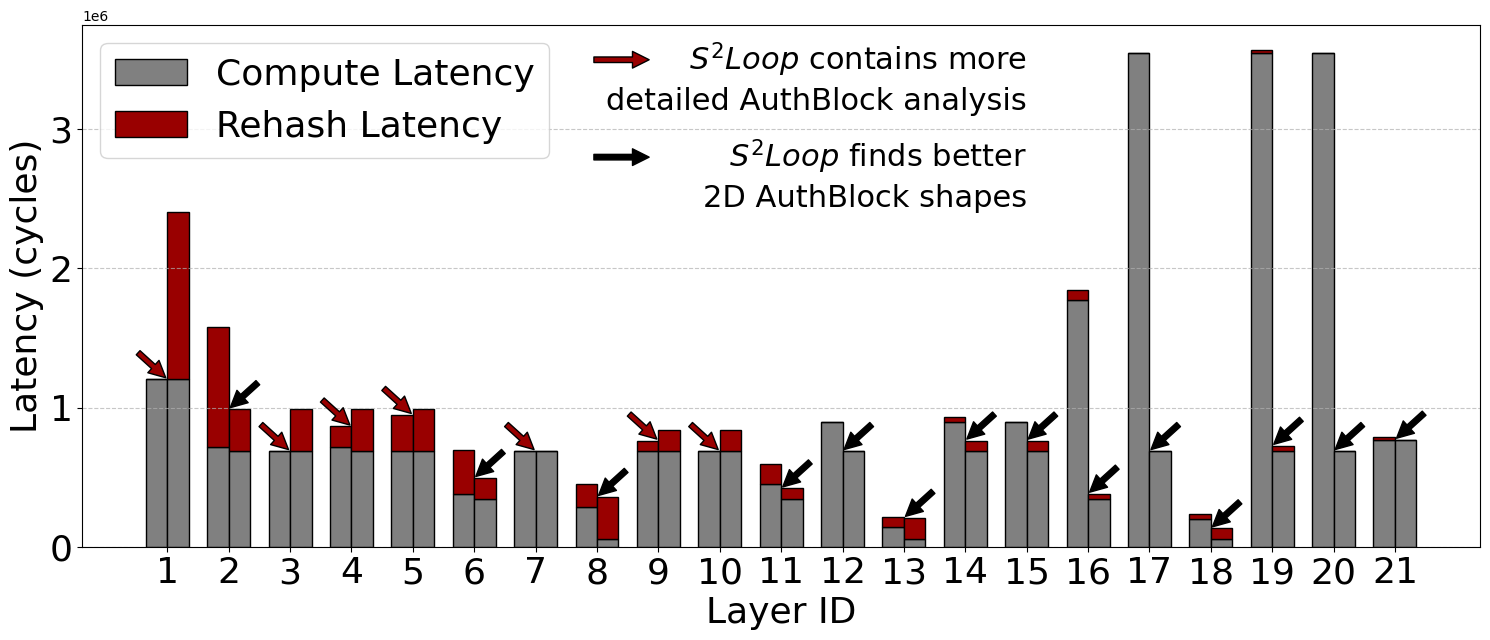

In [50]:
import numpy as np
import matplotlib.pyplot as plt

rehash_latencies_s2loop = [
    1204236,    # 1
    301068,     # 2
    301068,     # 3
    301068,     # 4
    301068,     # 5
    150540,     # 6
    0,     # 7
    301080,     # 8
    150540,     # 9
    150540,     # 10
    75276,      # 11
    0,     # 12
    150552,     # 13
    75276,      # 14
    75276,      # 15
    37644,      # 16
    0,      # 17
    75288,      # 18
    37644,      # 19
    0,          # 20
    0           # 21
]
latencies_s2loop = [
    1204280,    # 1
    688135,     # 2
    688135,     # 3
    688135,     # 4
    688135,     # 5
    344078,     # 6
    688184,     # 7
    57398,      # 8
    688184,     # 9
    688184,     # 10
    344142,     # 11
    688135,     # 12
    57358,      # 13
    688135,     # 14
    688135,     # 15
    344078,     # 16
    688132,     # 17
    57370,      # 18
    688132,     # 19
    688132,     # 20
    769536      # 21
]

latencies_sloop = [
    1204416,  # Layer 1
    713856,   # Layer 2 
    688128,   # Layer 3
    713856,   # Layer 4
    688128,   # Layer 5
    380928,   # Layer 6
    688128,   # Layer 7
    285696,   # Layer 8
    688128,   # Layer 9
    688128,   # Layer 10
    448512,   # Layer 11
    897024,   # Layer 12
    140160,   # Layer 13
    897024,   # Layer 14
    897024,   # Layer 15
    1772544,  # Layer 16
    3551232,  # Layer 17
    198144,   # Layer 18
    3551232,  # Layer 19
    3551232,  # Layer 20
    769536    # Layer 21
]
rehash_latencies_sloop = [
    0,          # 0
    861792,     # 1-2 and 1-4
    0,          # 2
    150552,     # 3-4
    259584,     # 4
    317208,     # 5-6 and 5-8
    0,          # 6
    163116,     # 7-9
    75276,      # 8-9
    0,          # 9
    145356,     # 10-11 and 10-13
    0,          # 11
    75462,      # 12-14
    37638,      # 13-14
    0,          # 14
    70278,      # 15-16 and 15-18
    0,          # 16
    38022,      # 17-19
    18822,      # 18-19
    0,          # 19
    19212       # 20-21
]

# Create data for stacked bar chart
layers = range(1, 22)  # 21 layers
width = 0.35  # Reduced width to accommodate side-by-side bars

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6.5))

# Create stacked bars for sloop
sloop_bars = ax.bar(np.array(layers) - width/2, latencies_sloop, width, label='Layer Latency (Sloop)', color='grey', edgecolor='black')
sloop_rehash = ax.bar(np.array(layers) - width/2, rehash_latencies_sloop, width, bottom=latencies_sloop, label='Rehash Latency (Sloop)', color='#990000', edgecolor='black')

# Create stacked bars for s2loop
s2loop_bars = ax.bar(np.array(layers) + width/2, latencies_s2loop, width, label='Layer Latency (S2loop)', color='grey', edgecolor='black')
s2loop_rehash = ax.bar(np.array(layers) + width/2, rehash_latencies_s2loop, width, bottom=latencies_s2loop, label='Rehash Latency (S2loop)', color='#990000', edgecolor='black')

# Add black arrows where s2loop total is less than sloop total
for i in range(len(layers)):
    sloop_total = latencies_sloop[i] + rehash_latencies_sloop[i]
    s2loop_total = latencies_s2loop[i] + rehash_latencies_s2loop[i]
    if s2loop_total < sloop_total:
        ax.annotate('',
                   xy=(layers[i], s2loop_total), 
                   xytext=(layers[i]+0.5, s2loop_total+200000),
                   arrowprops=dict(facecolor='black', shrink=0.05),
                   fontsize=12)

# Add arrows for locations where sloop total is less than s2loop total
for i in range(len(layers)):
    sloop_total = latencies_sloop[i] + rehash_latencies_sloop[i]
    s2loop_total = latencies_s2loop[i] + rehash_latencies_s2loop[i]
    if sloop_total < s2loop_total:
        ax.annotate('',
                   xy=(layers[i], sloop_total),
                   xytext=(layers[i]-0.5, sloop_total+200000),
                   arrowprops=dict(facecolor='#990000', shrink=0.05),
                   fontsize=12)

# Customize the plot
ax.set_xlabel('Layer ID', fontsize=26)
ax.set_ylabel('Latency (cycles)', fontsize=26)
# Create legend
legend = ax.legend(['Compute Latency', 'Rehash Latency'], fontsize=26)

# Add arrow annotation next to legend
ax.annotate('',
           xy=(8.9, 3.5*1e6),
           xytext=(7.9, 3.5*1e6),
           arrowprops=dict(facecolor='#990000', shrink=0.05),
           fontsize=20)
# Add text annotation
ax.text(15, 3.5*1e6, r'$S^2Loop$ contains more', fontsize=22, ha='right', va='center')
ax.text(15, 3.2*1e6, 'detailed AuthBlock analysis', fontsize=22, ha='right', va='center')

ax.annotate('',
           xy=(8.9, 2.8*1e6),
           xytext=(7.9, 2.8*1e6),
           arrowprops=dict(facecolor='black', shrink=0.05),
           fontsize=20)
ax.text(15, 2.8*1e6, r'$S^2Loop$ finds better', fontsize=22, ha='right', va='center')
ax.text(15, 2.5*1e6, '2D AuthBlock shapes', fontsize=22, ha='right', va='center')

# Set x-axis ticks
ax.set_xticks(layers)
ax.tick_params(axis='both', which='major', labelsize=26)

# Add grid for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.savefig("single_layer_comparison.pdf", bbox_inches="tight", transparent=True)

plt.show()